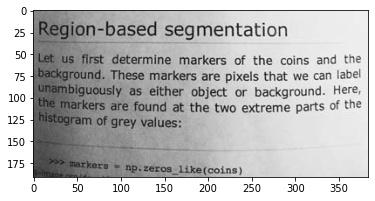

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import skimage.io
import skimage.color
import skimage.filters

# load the image
image = skimage.io.imread("Image/page.png", as_gray=True)

fig, ax = plt.subplots()
plt.imshow(image, cmap="gray")
plt.show()

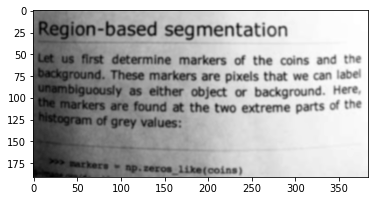

In [9]:
blurred_image = skimage.filters.gaussian(image, sigma=1.0)

fig, ax = plt.subplots()
plt.imshow(blurred_image, cmap='gray')
plt.show()

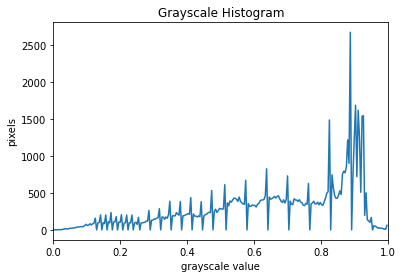

In [10]:
histogram, bin_edges = np.histogram(image, bins=256, range=(0.0, 1.0))

fig, ax = plt.subplots()
plt.plot(bin_edges[0:-1], histogram)
plt.title("Grayscale Histogram")
plt.xlabel("grayscale value")
plt.ylabel("pixels")
plt.xlim(0, 1.0)
plt.show()


In [15]:
# perform automatic thresholding
t = 0.615234327
print("Found automatic threshold t = {}.".format(t)) 

Found automatic threshold t = 0.615234327.


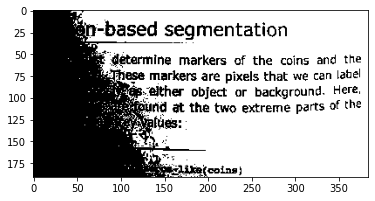

In [16]:
# create a binary mask with the threshold found by Otsu's method
binary_mask = image > t

fig, ax = plt.subplots()
plt.imshow(binary_mask, cmap='gray')
plt.show()

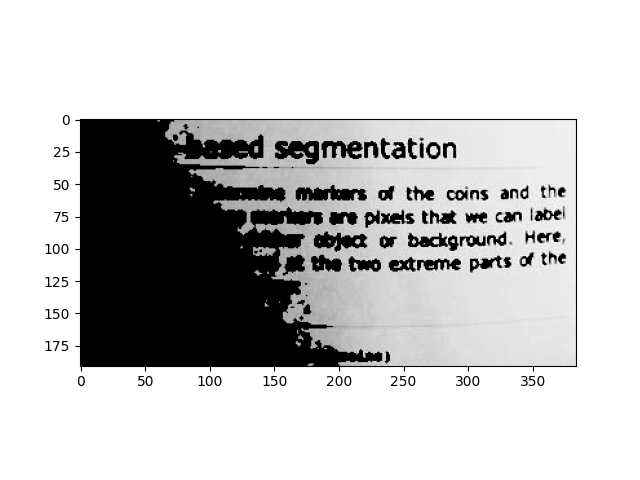

In [ ]:
# apply the binary mask to select the foreground
selection = image.copy()
selection[~binary_mask] = 0

fig, ax = plt.subplots()
plt.imshow(selection, cmap='gray')
plt.show()

In [17]:
from matplotlib import image as img
import numpy as np
import matplotlib.pyplot as plt
import skimage.io


image = skimage.io.imread("Image/page.png", as_gray=True)

# Set total number of bins in the histogram
bins_num = 256

# Get the image histogram
hist, bin_edges = np.histogram(image, bins=bins_num)

# Get normalized histogram if it is required

# Calculate centers of bins
bin_mids = (bin_edges[:-1] + bin_edges[1:]) / 2.

# Iterate over all thresholds (indices) and get the probabilities w1(t), w2(t)
weight1 = np.cumsum(hist)
weight2 = np.cumsum(hist[::-1])[::-1]

# Get the class means mu0(t)
mean1 = np.cumsum(hist * bin_mids) / weight1
# Get the class means mu1(t)
mean2 = (np.cumsum((hist * bin_mids)[::-1]) / weight2[::-1])[::-1]

inter_class_variance = weight1[:-1] * weight2[1:] * (mean1[:-1] - mean2[1:]) ** 2

# Maximize the inter_class_variance function val
index_of_max_val = np.argmax(inter_class_variance)

threshold = bin_mids[:-1][index_of_max_val]

image[image<threshold] = 0
image[image>threshold] = 1

img.imsave("otsu_thresholding.png",image)


In [2]:
threshold

0.615234375